In [1]:
from IPython.display import Image 

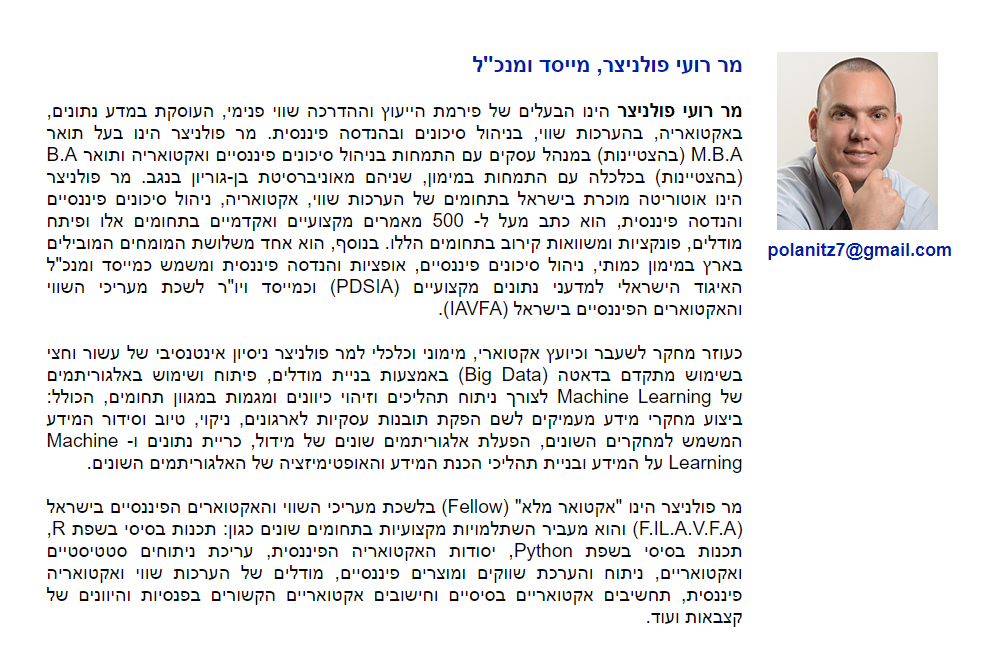

In [2]:
Image(filename='roi123.png')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the file regdataex.csv

In [4]:
df = pd.read_csv("regdataex.csv")

Use head, info and describe 

In [5]:
df.head()

,A,B,C,D,E,F,G,H,I,Target
0,20,39,-8,89,103,10,320,C,21,2637
1,46,39,6,45,102,10,109,B,17,4265
2,62,12,3,12,146,26,384,D,16,5906
3,33,45,-1,89,103,36,444,A,7,3326
4,29,28,-72,12,126,23,117,D,2,703


In [6]:
df['H'].unique()

array(['C', 'B', 'D', 'A'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         500 non-null int64
E         500 non-null int64
F         500 non-null int64
G         500 non-null int64
H         500 non-null object
I         500 non-null int64
Target    500 non-null int64
dtypes: int64(9), object(1)
memory usage: 39.2+ KB


In [8]:
df.describe()

,A,B,C,D,E,F,G,I,Target
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.920000,28.28000,-38.952000,372.830000,146.634000,20.200000,224.966000,11.020000,3040.658000
std,15.694273,10.39778,34.834416,1645.237636,28.975908,11.878307,135.069598,6.771951,1778.948155
min,14.000000,10.00000,-100.000000,-2000.000000,100.000000,0.000000,-20.000000,0.000000,-1221.000000
25%,26.000000,19.00000,-68.000000,20.000000,121.000000,10.000000,111.750000,5.000000,1604.750000
50%,40.000000,28.00000,-39.500000,65.000000,145.000000,20.000000,225.000000,11.000000,2980.500000
75%,54.000000,38.00000,-7.750000,99.000000,169.000000,30.000000,338.750000,17.000000,4398.750000
max,67.000000,45.00000,20.000000,6800.000000,200.000000,40.000000,450.000000,22.000000,7107.000000


Create a pair plot

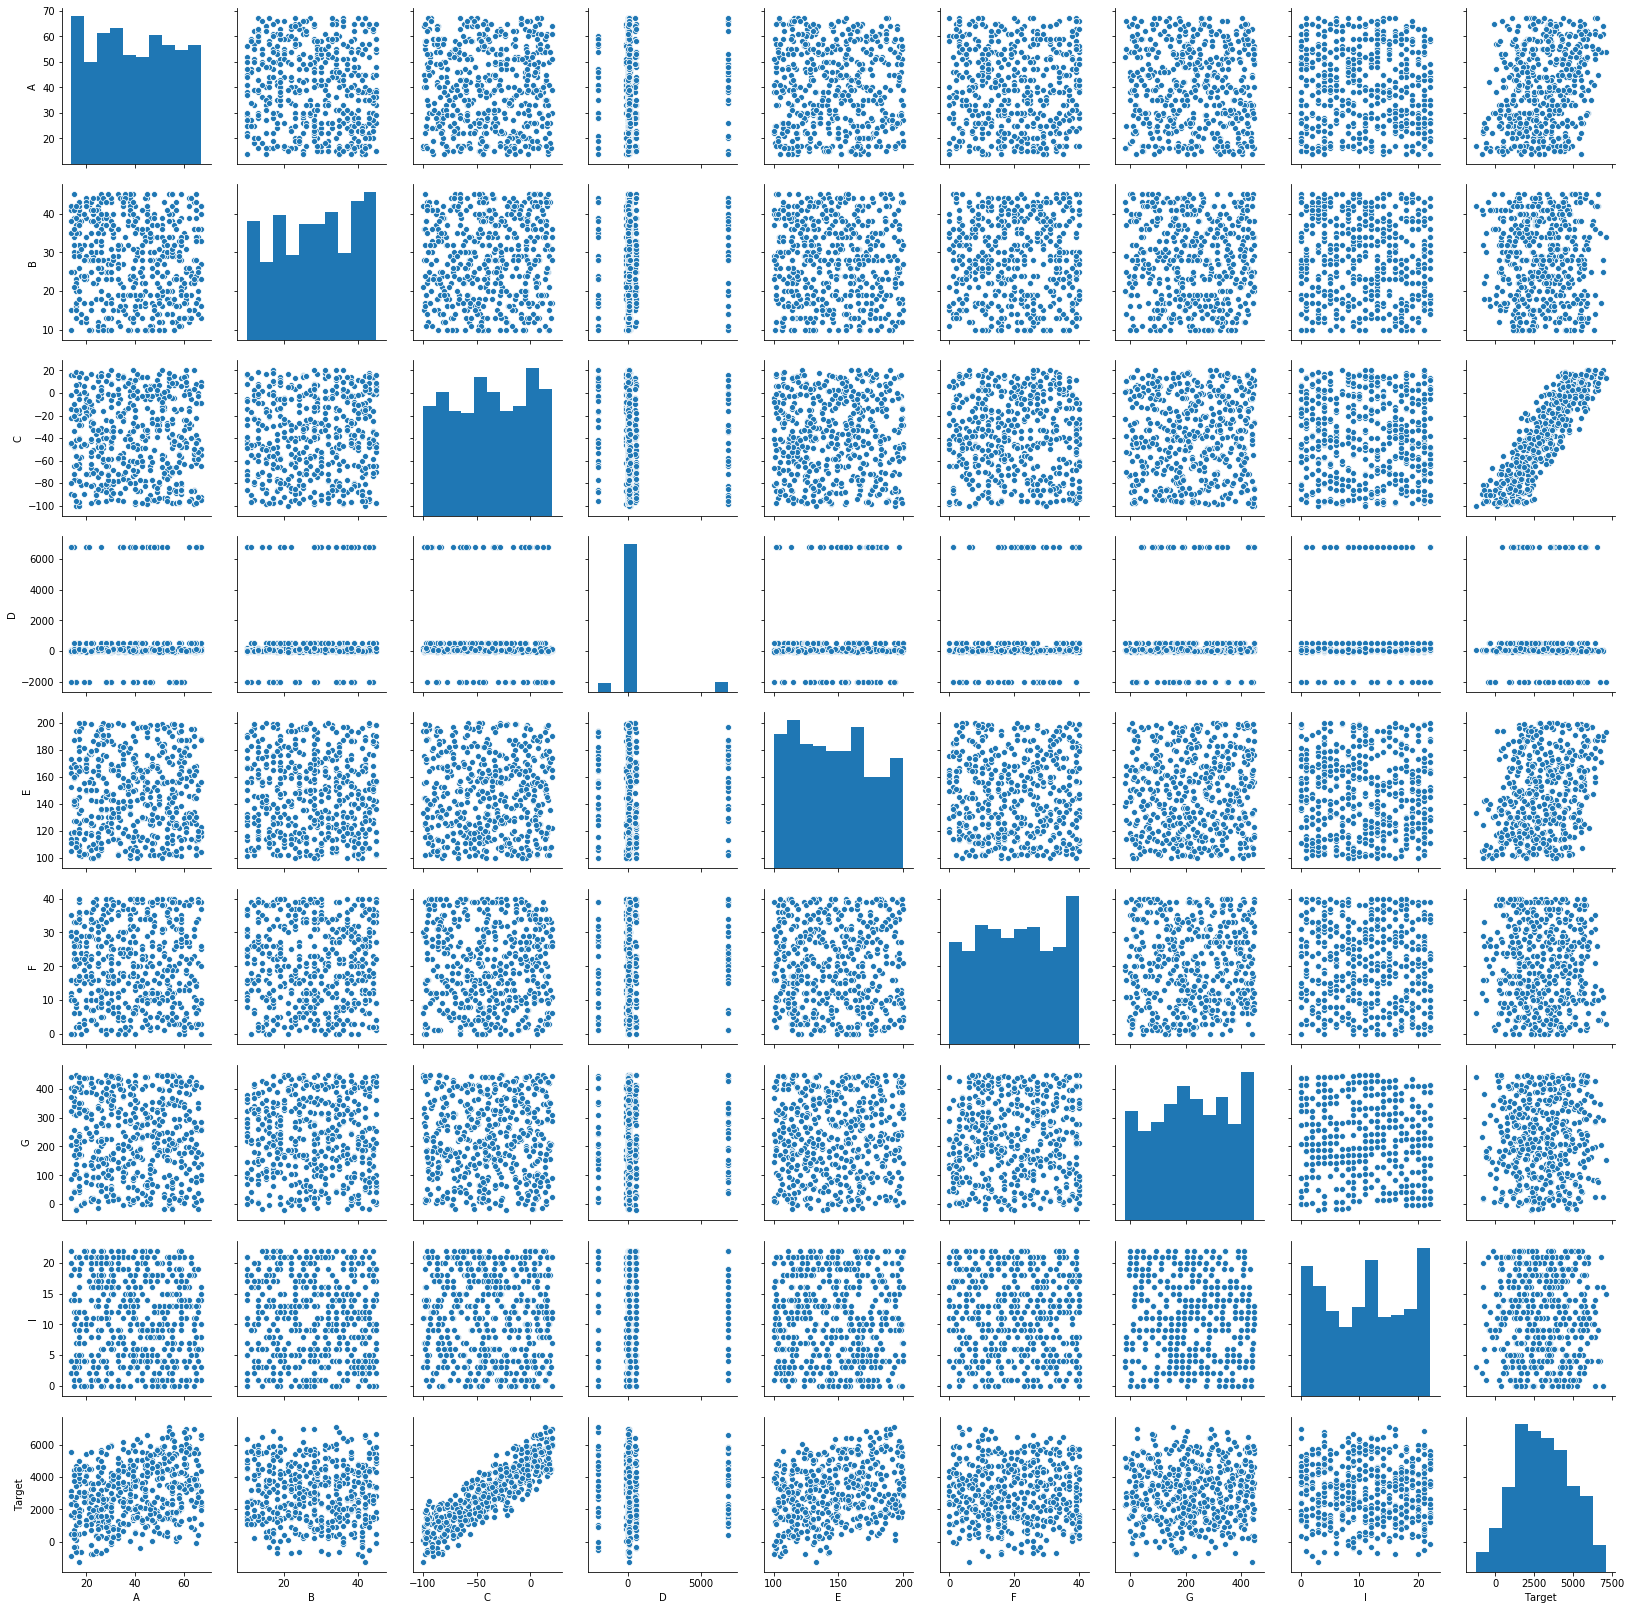

In [9]:
sns.pairplot(df)
plt.show()

Create a Linear Regression model:<br>
* split train and test
* check the results

In [10]:
data = df.copy()
cat_vars=['H']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['H']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [11]:
data_final=data[to_keep]
data_final.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'Target', 'H_A', 'H_B',
       'H_C', 'H_D'], dtype=object)

In [12]:
X = data_final.loc[:, data_final.columns != 'Target']
y = data_final.loc[:, data_final.columns == 'Target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (350, 12)
Test data size: (150, 12)


In [14]:
X_train.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'H_A', 'H_B', 'H_C', 'H_D'], dtype='object')

In [15]:
import statsmodels.api as sm
from statsmodels import regression
# Add a constant to the independent value
X1 = sm.add_constant(X.astype(int))

# make regression model 
model = sm.OLS(y.astype(int), X1.astype(int))

# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2004.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:57:29   Log-Likelihood:                -3492.7
No. Observations:                 500   AIC:                             7009.
Df Residuals:                     488   BIC:                             7060.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        394.1408     70.234      5.612      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)  

In [18]:
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))

R squared of the linear regression model: 97.51%


In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

RMSE of the linear regression model: 269.0


Try to reduce the dimensionality check the model with:<br>
* ['A', 'B', 'E', 'F', 'G', 'I']
* ['A', 'C', 'D', 'F', 'G', 'I']
* ['A', 'E', 'F', 'G', 'I']
* ['B', 'E', 'F']


In [20]:
df1=data_final.copy()

In [21]:
X = df1[['A', 'B', 'E', 'F', 'G', 'I']]
y = df1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

Training data size: (350, 6)
Test data size: (150, 6)
R squared of the linear regression model: 16.02%
RMSE of the linear regression model: 1,563.0


In [22]:
X = df1[['A', 'E', 'D', 'F', 'G', 'I']]
y = df1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

Training data size: (350, 6)
Test data size: (150, 6)
R squared of the linear regression model: 16.98%
RMSE of the linear regression model: 1,554.0


In [23]:
X = df1[['A', 'E', 'F', 'G', 'I']]
y = df1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

Training data size: (350, 5)
Test data size: (150, 5)
R squared of the linear regression model: 17.11%
RMSE of the linear regression model: 1,552.0


In [24]:
X = df1[['B', 'E', 'F']]
y = df1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

Training data size: (350, 3)
Test data size: (150, 3)
R squared of the linear regression model: 7.06%
RMSE of the linear regression model: 1,644.0


Use itertools.combination to find the minimum set of features to get a score > 0.95<br>
hint for using itertools:

In [25]:
modelInput=[['A'],
            ['B'],
            ['C'],            
            ['D'],             
            ['E'],             
            ['F'],
            ['G'],
            ['I'],            
            ['H_A'],
            ['H_B'],
            ['H_C'],
            ['H_D']]

In [26]:
import itertools
from itertools import combinations
#function that gets a list->returns all cobinations of list (example: for [1,2,3] will return 1,2,3,[1,3],[1,2],[2,3],[1,2,3])
def sublists(input):
    for length in range(1,len(input) + 1):
        yield from itertools.combinations(input, length)
#apply function on all features
modelsFeatures=list(sublists(modelInput))

In [27]:
#creating data frame the will contain scores per each model
summaryDf = pd.DataFrame(columns=['ModelColumns','RMSE','RSQUARE'])

In [28]:
data_final.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'Target', 'H_A', 'H_B',
       'H_C', 'H_D'], dtype=object)

In [29]:
X = data_final.loc[:, data_final.columns != 'Target']
y = data_final.loc[:, data_final.columns == 'Target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
from sklearn import metrics
#For each model we will train on the train set and validate scores on the valid set and add to dummary data frame.
for current_features in modelsFeatures:
    modelFeatures=[item for sublist in current_features for item in sublist]
    lm = LinearRegression()
    model_X_train=X_train[modelFeatures]
    lm.fit(model_X_train,y_train)
    model_X_test=X_test[modelFeatures]
    predictions_test_set = lm.predict(model_X_test)

    MSE=metrics.mean_squared_error(y_test, predictions_test_set)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions_test_set))
    RSQUARED=metrics.explained_variance_score(y_test, predictions_test_set)

    summaryDf = summaryDf.append({'ModelColumns':','.join(modelFeatures),'RMSE':RMSE,'RSQUARE':RSQUARED}, ignore_index=True)

In [32]:
print("Number of models compared")
print(summaryDf.shape[0])

Number of models compared
4095


### looking at 10 best scores by RMSE

In [33]:
summaryDf.sort_values(by='RMSE').head(10)

,ModelColumns,RMSE,RSQUARE
2526,"A,B,C,D,E,H_A,H_D",266.686848,0.975536
1630,"A,B,C,E,H_A,H_D",266.763500,0.975522
2527,"A,B,C,D,E,H_B,H_C",266.782483,0.975520
1631,"A,B,C,E,H_B,H_C",266.794014,0.975518
3830,"A,B,C,D,E,H_A,H_B,H_C,H_D",267.091897,0.975463
3332,"A,B,C,D,E,H_A,H_B,H_C",267.091897,0.975463
3334,"A,B,C,D,E,H_A,H_C,H_D",267.091897,0.975463
3333,"A,B,C,D,E,H_A,H_B,H_D",267.091897,0.975463
3335,"A,B,C,D,E,H_B,H_C,H_D",267.091897,0.975463
2598,"A,B,C,E,H_A,H_C,H_D",267.166695,0.975449


In [34]:
#adding column to summary df ->number of columns in feature
summaryDf["NUM_FEATURES"]=summaryDf.ModelColumns.apply(lambda x: len(x.split(",")))

In [35]:
summaryDf.sort_values(by='RSQUARE', ascending=False).head()

,ModelColumns,RMSE,RSQUARE,NUM_FEATURES
2526,"A,B,C,D,E,H_A,H_D",266.686848,0.975536,7
1630,"A,B,C,E,H_A,H_D",266.763500,0.975522,6
2527,"A,B,C,D,E,H_B,H_C",266.782483,0.975520,7
1631,"A,B,C,E,H_B,H_C",266.794014,0.975518,6
3830,"A,B,C,D,E,H_A,H_B,H_C,H_D",267.091897,0.975463,9


In [36]:
print("Number of models with over 0.95 R-square value")
print(summaryDf[summaryDf["RSQUARE"]>0.95].shape[0])

Number of models with over 0.95 R-square value
512


### There are 512 models that give R-square value ~ 0.95

To minimize complexity of model I will choose my model to be the model that is R-square value is greater than 0.95 with minimum features

In [37]:
print("Model with R-square value over 0.95 and minimum features")
chosenModel=summaryDf[summaryDf["RSQUARE"]>0.95].sort_values(by='NUM_FEATURES').head(1).ModelColumns.iloc[0].split(",")
chosenModel

Model with R-square value over 0.95 and minimum features


['A', 'C', 'E']

### Selected features:['A', 'C', 'E']

In [38]:
chosenModel=['A', 'C', 'E']

In [39]:
lm =LinearRegression()
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_test=X_test[chosenModel]
predictions_test_set = lm.predict(model_X_test)

In [40]:
MSE=metrics.mean_squared_error(y_test, predictions_test_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions_test_set))
RSQUARED=metrics.explained_variance_score(y_test, predictions_test_set)

In [41]:
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

RMSE: 269.53403660398203
RSQUARED: 0.9750129953030333


In [42]:
print("Model Intercept:  ",lm.intercept_)

Model Intercept:   [490.89980244]


In [43]:
print("Model Coeffecient:  ",lm.coef_)

Model Coeffecient:   [[34.95628797 45.35009862 19.91412056]]


# Compare RandomForestRegressor model with selected features from above

In [44]:
from sklearn.ensemble import RandomForestRegressor

lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_test=X_test[chosenModel]
predictions_test_set = lm.predict(model_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [45]:
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test, predictions_test_set)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, predictions_test_set))
RSQUARED=metrics.explained_variance_score(y_test, predictions_test_set)

In [46]:
print('RMSE:',RMSE )
print('RSQUARED:', RSQUARED)

RMSE: 336.72887005918176
RSQUARED: 0.9617821000176705


### Linear Regression gives better results

# Predict+Evaluate on test set with chosen model

## Predict

In [47]:
lm =LinearRegression()
lm = RandomForestRegressor(random_state=100)
model_X_train=X_train[chosenModel]
lm.fit(model_X_train,y_train)
model_X_test=X_test[chosenModel]
predictions_test_set = lm.predict(model_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


## Evaluate

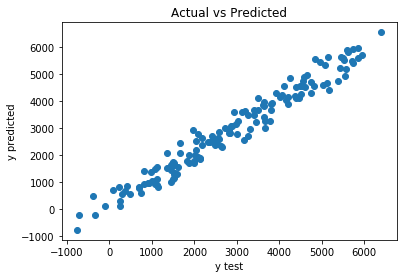

In [48]:
plt.scatter(y_test,predictions_test_set)
plt.xlabel('y test')
plt.ylabel("y predicted")
plt.title("Actual vs Predicted")
plt.show()

In [49]:
df2 = pd.DataFrame(y_test)
df2.rename(columns={'Target': 'true'}, inplace=True)

In [50]:
df2['predicted']=lm.predict(model_X_test)

In [51]:
df2['residual']=df2['true']-df2['predicted']

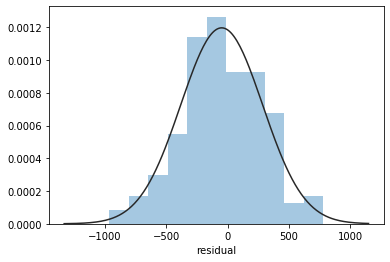

In [52]:
from scipy.stats import norm
ax = sns.distplot(df2['residual'], fit=norm, kde=False)